In [11]:
import cv2

participant_number = '3'
video_path = f"./data/Videos/P{participant_number}.avi"


cap = cv2.VideoCapture(video_path)

In [12]:
from frame import Frame
from typing import List

frames: List[Frame] = []
cap = cv2.VideoCapture(video_path)
while True:
    ret, frame = cap.read()
    if not ret:
        break
    frames.append(Frame(len(frames), participant_number, frame))
cap.release()

In [13]:
%load_ext autoreload
%autoreload 2
from smile_detector import SmileDetector
import random

smile_detector = SmileDetector()
frames_selection = random.sample(frames, 20)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Face

In [14]:
for frame in frames_selection:
    frame.face = smile_detector.get_face(frame.image)

# Smile

In [15]:
for frame in frames_selection:
    frame.smile = smile_detector.get_smile(frame.image, frame.face) if frame.face is not None else None

In [16]:
for frame in frames_selection:
    frame.facial_landmarks = smile_detector.get_face_landmarks(frame)

# Display Frames

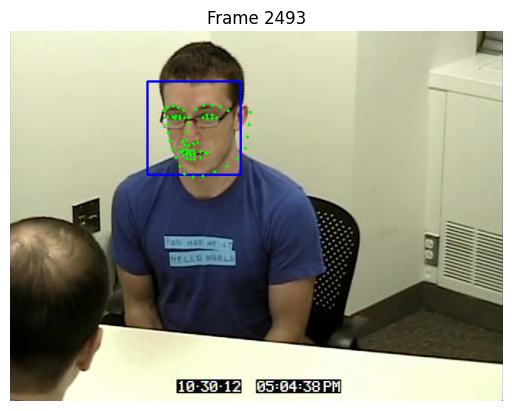

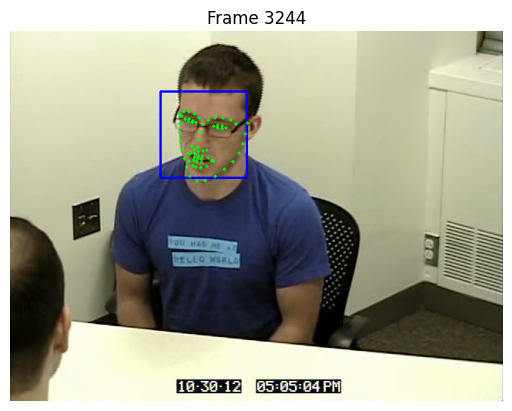

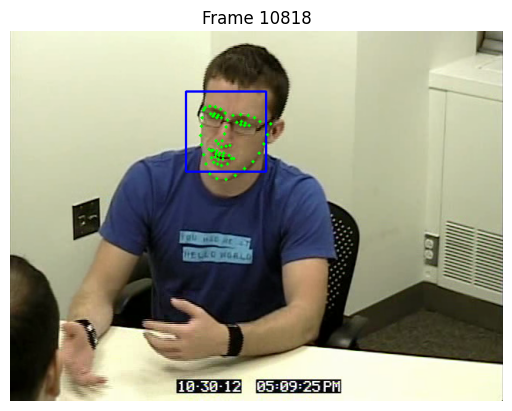

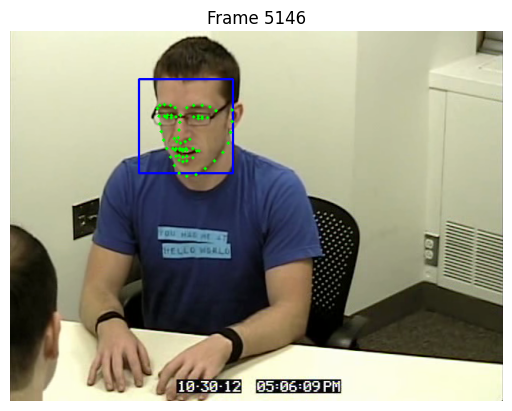

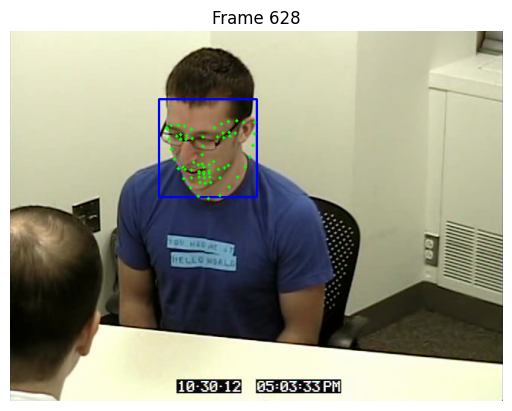

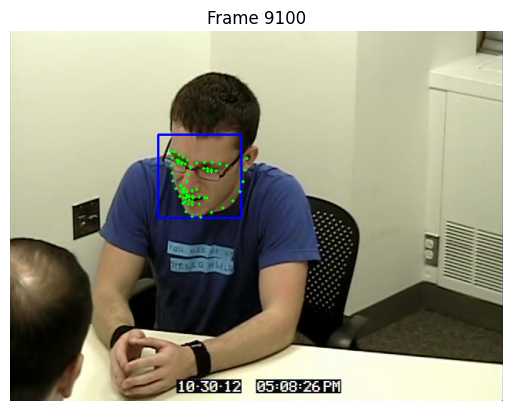

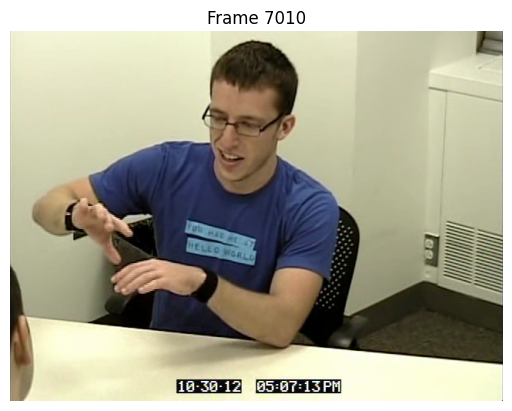

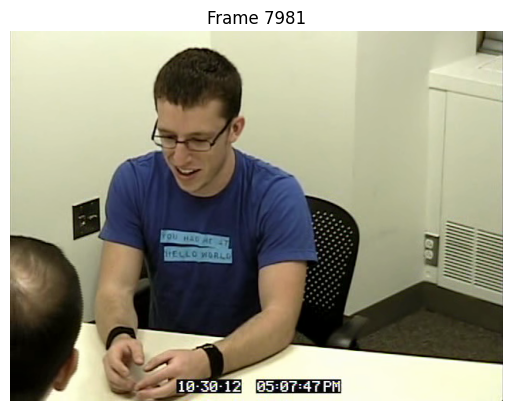

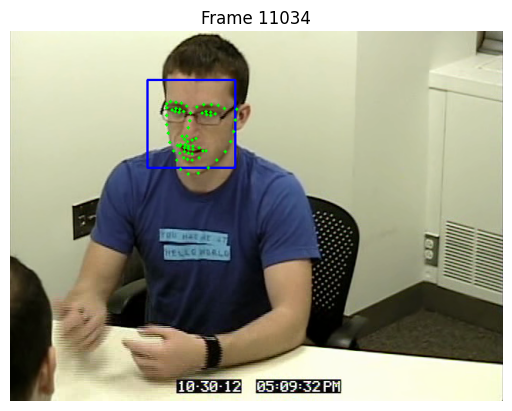

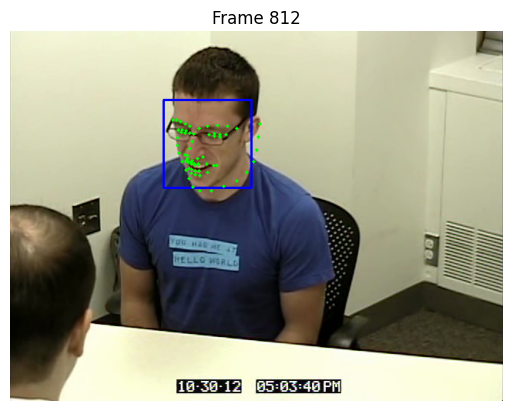

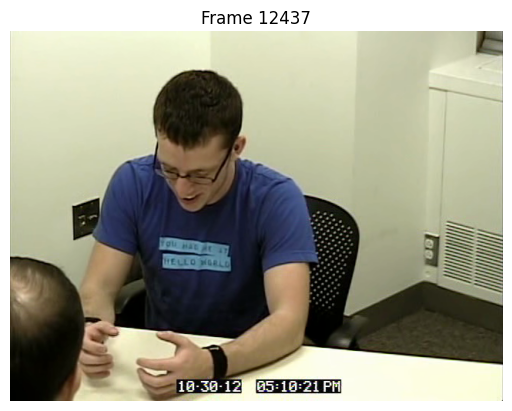

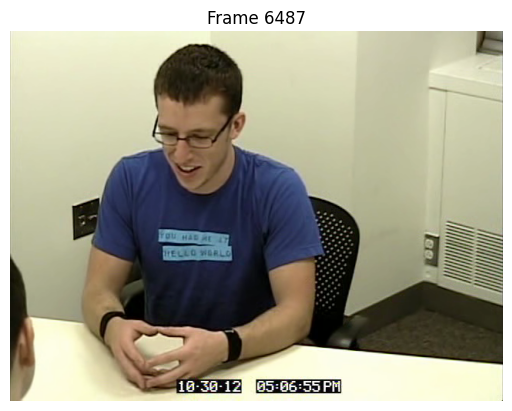

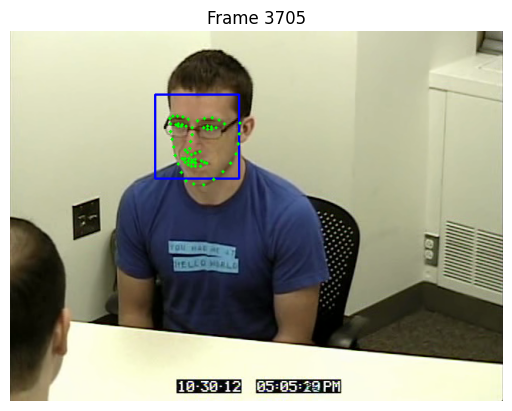

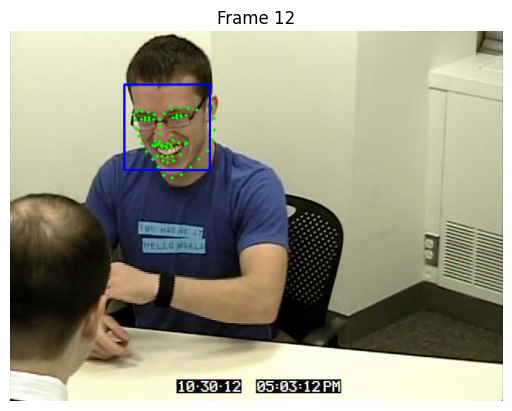

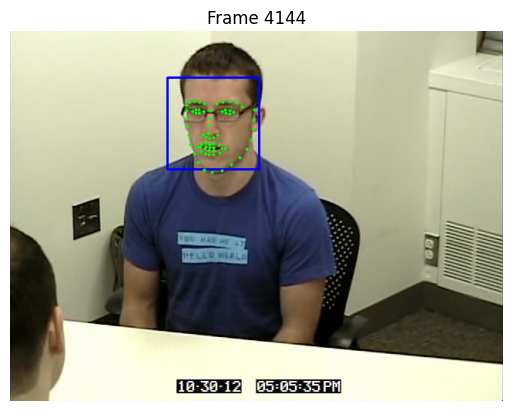

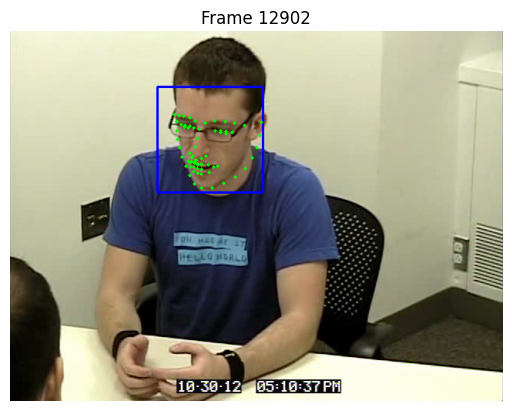

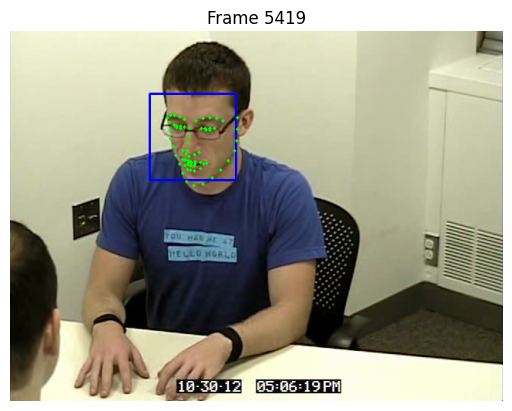

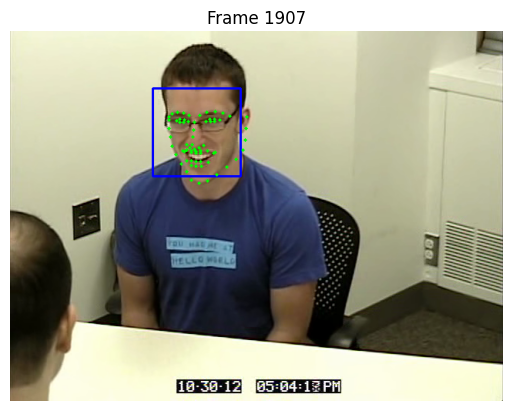

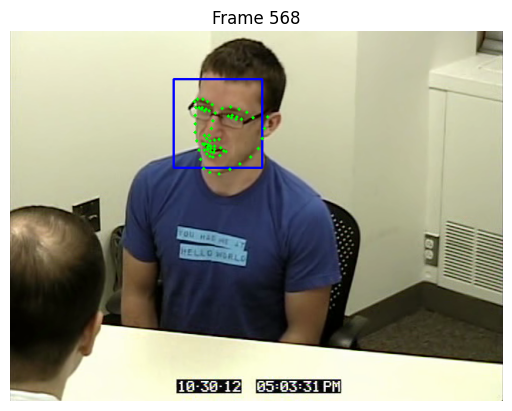

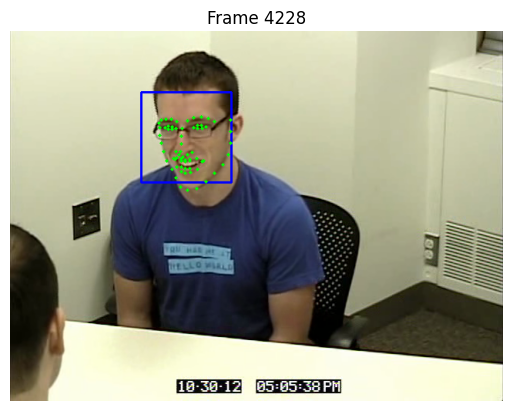

In [17]:
for frame in frames_selection:
    frame.create_drawable_image_copy()
    frame.draw_face()
    # frame.draw_smile()
    frame.draw_facial_landmarks()
    frame.display()